In [13]:
library(factoextra)
library("e1071")
library(GGally)
library(ggplot2)

Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [2]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [4]:
data(iris)


In [5]:
#first 4 are numeric and 5th is factor
str(iris) 

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
head(iris,5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


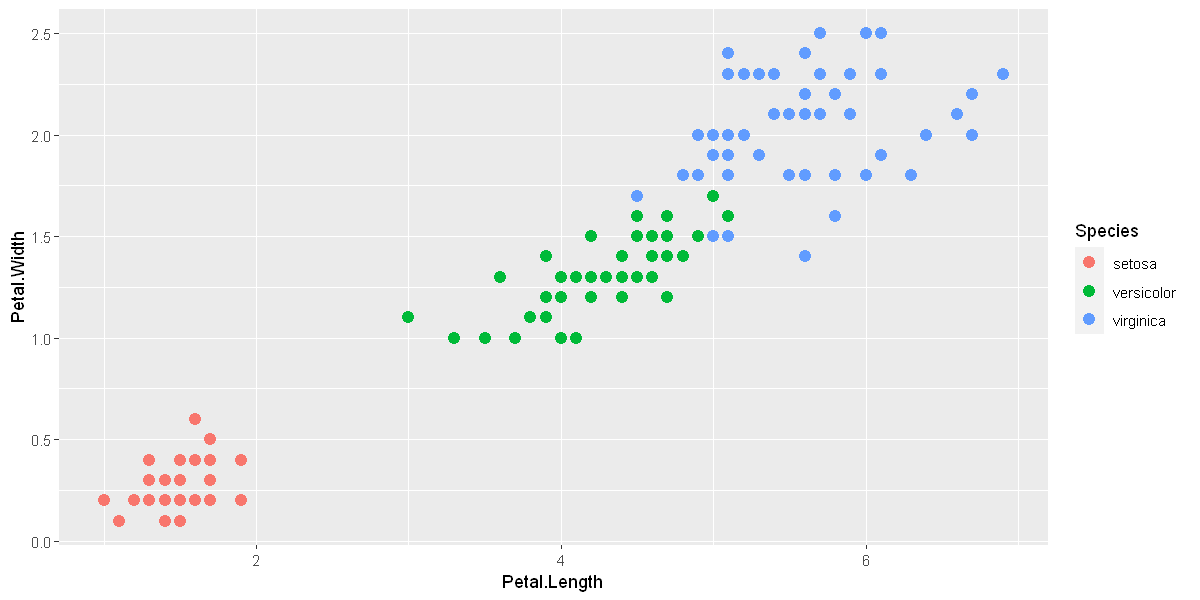

In [23]:
# Exploratory Visualization
ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) + geom_point(size=3)

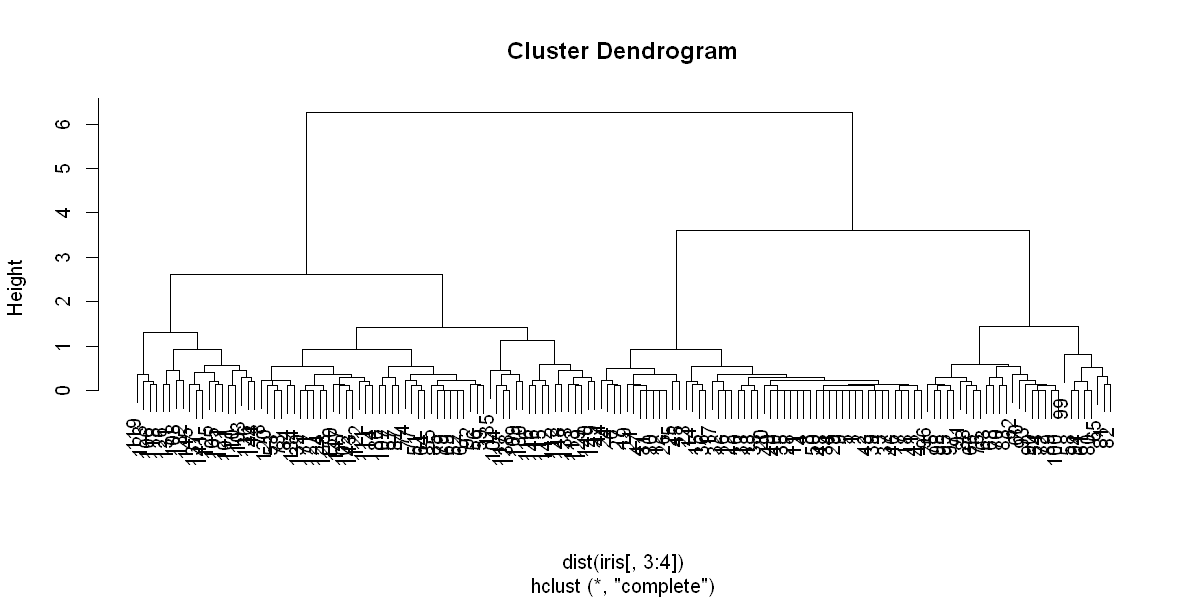

In [21]:
clusters <- hclust(dist(iris[, 3:4]),method ="complete")
plot(clusters)

In [10]:
clusterCut <- cutree(clusters, 3)

In [11]:
table(clusterCut, iris$Species)

          
clusterCut setosa versicolor virginica
         1     50          0         0
         2      0         21        50
         3      0         29         0

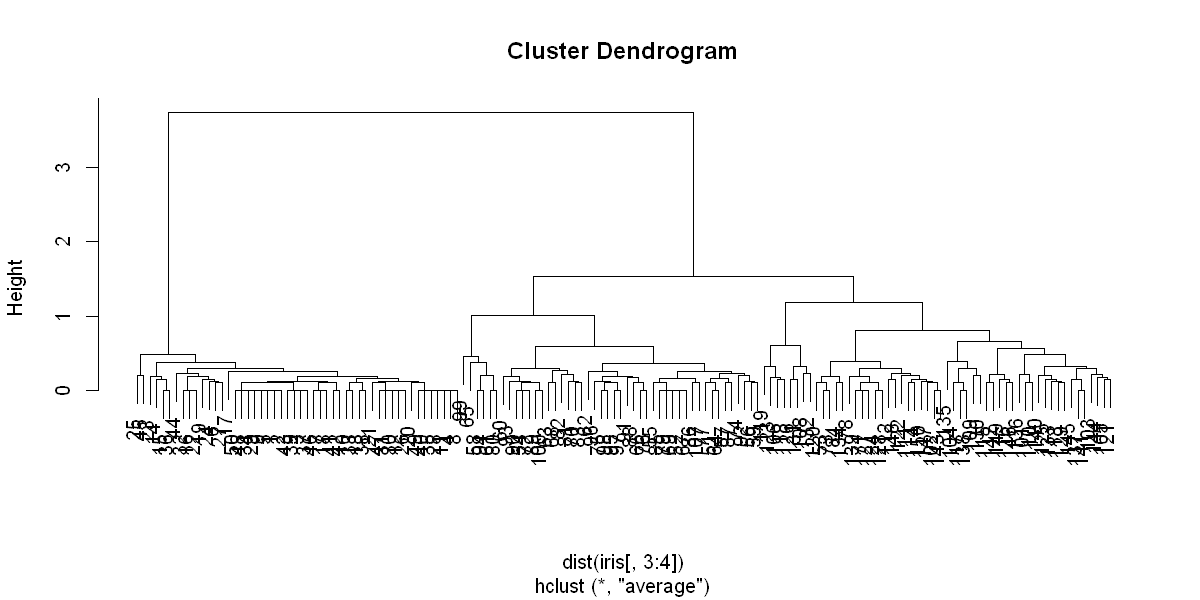

In [25]:
clusters <- hclust(dist(iris[, 3:4]), method = 'average')
plot(clusters)

In [26]:
clusterCut <- cutree(clusters, 3)
table(clusterCut, iris$Species)

          
clusterCut setosa versicolor virginica
         1     50          0         0
         2      0         45         1
         3      0          5        49

Warning message:
"Use of `iris$Species` is discouraged. Use `Species` instead."

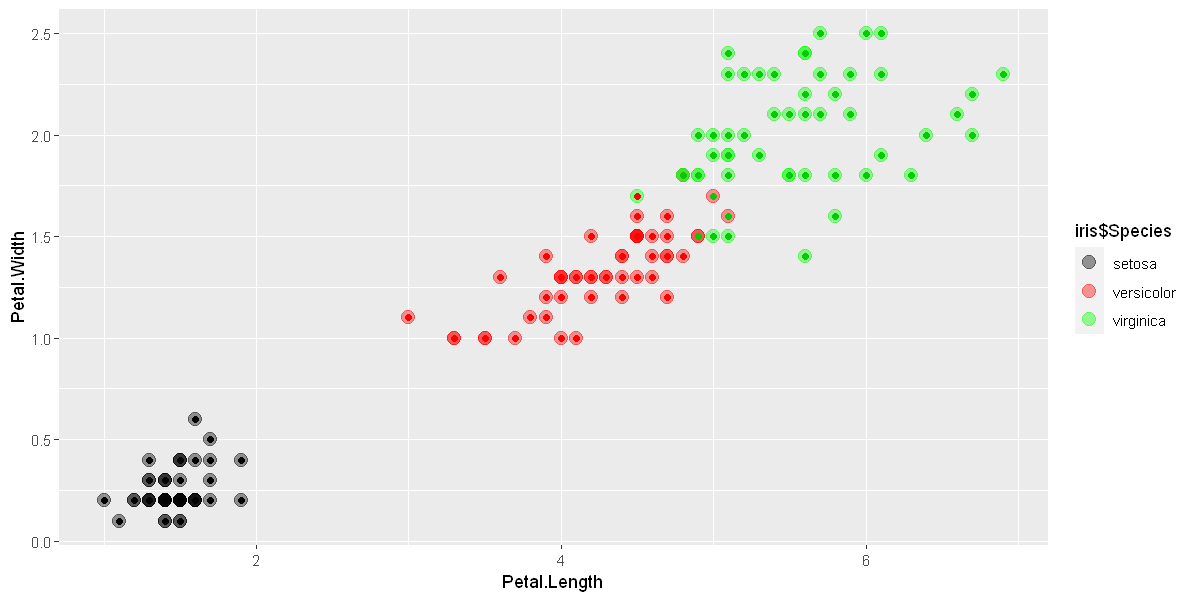

In [28]:
# All the points where the inner color doesn’t match the outer color are the ones which were clustered incorrectly
ggplot(iris, aes(Petal.Length, Petal.Width, color = iris$Species)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = clusterCut) + 
  scale_color_manual(values = c('black', 'red', 'green'))